# Features Description

| Column Name              | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| year                      | Year of investment (2010–2025)                                              |
| quarter                   | Quarter of investment (Q1–Q4)                                               |
| period                    | Combination of year and quarter (e.g., 2025-Q2)                             |
| investment_status          | Investment type: Foreign (PMA) or Domestic (PMDN)                          |
| country                   | Origin country of foreign investment (for PMA)                              |
| region                    | Grouping of investor country (Asia, Europe, etc.)                           |
| main_sector               | Primary, Secondary, or Tertiary                                             |
| sector_name               | Name of investment sector (23 official categories by BKPM)                  |
| kbli_2digit               | 2-digit KBLI industry classification code                                   |
| province                  | Province location of the investment project                                 |
| district_city             | District/City location of the investment project                            |
| java_outside_java          | Location category: Java / Outside Java                                      |
| island                    | Island group (Sumatra, Kalimantan, Sulawesi, Java, Papua, etc.)             |
| investment_idr_million    | Investment value in million Indonesian Rupiah (IDR)                         |
| investment_usd_thousand   | Investment value in thousand US Dollars (USD)                               |
| indonesian_workers        | Number of Indonesian workers absorbed by the investment project (persons)   |

# Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
sns.set_palette("pastel", 5)

# Load and Preprocessing Data

In [3]:
df = pd.read_csv("investasi_2010-2025.csv")
df.head()

,period,investment_status,region,country,main_sector,sector_name,kbli_2digit,province,district_city,java_outside_java,island,investment_idr_million,investment_usd_thousand,indonesian_workers,year,quarter
0,2010-Q1,PMA,Afrika,Mauritania,Sektor Sekunder,Industri Makanan,(10-2015) Industri makanan,Kalimantan Tengah,Kabupaten Seruyan,Luar Jawa,Kalimantan,279631.2,29748.0,0,2010,Q1
1,2010-Q1,PMA,Afrika,Mauritius,Sektor Tersier,Perdagangan dan Reparasi,"(46-2015) Perdagangan besar, bukan mobil dan s...",Nusa Tenggara Barat,Kota Mataram,Luar Jawa,Bali dan Nusa Tenggara,0.0,0.0,44,2010,Q1
2,2010-Q1,PMA,Afrika,Seychelles,Sektor Primer,Pertambangan,(06-2015) Pertambangan minyak bumi dan gas ala...,Riau,Kabupaten Bengkalis,Luar Jawa,Sumatera,2265.3,241.0,692,2010,Q1
3,2010-Q1,PMA,Afrika,Seychelles,Sektor Primer,"Tanaman Pangan, Perkebunan, dan Peternakan","(01-2015) Pertanian tanaman, peternakan, perbu...",Kalimantan Barat,Kabupaten Sanggau,Luar Jawa,Kalimantan,0.0,0.0,110,2010,Q1
4,2010-Q1,PMA,Afrika,Seychelles,Sektor Primer,"Tanaman Pangan, Perkebunan, dan Peternakan","(01-2015) Pertanian tanaman, peternakan, perbu...",Nusa Tenggara Barat,Kabupaten Lombok Barat,Luar Jawa,Bali dan Nusa Tenggara,0.0,0.0,90,2010,Q1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604679 entries, 0 to 604678
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   period                   604679 non-null  object 
 1   investment_status        604679 non-null  object 
 2   region                   604679 non-null  object 
 3   country                  604679 non-null  object 
 4   main_sector              604679 non-null  object 
 5   sector_name              604679 non-null  object 
 6   kbli_2digit              604679 non-null  object 
 7   province                 604679 non-null  object 
 8   district_city            604679 non-null  object 
 9   java_outside_java        604679 non-null  object 
 10  island                   604679 non-null  object 
 11  investment_idr_million   604679 non-null  float64
 12  investment_usd_thousand  604679 non-null  float64
 13  indonesian_workers       604679 non-null  int64  
 14  year

In [5]:
df.columns

Index(['period', 'investment_status', 'region', 'country', 'main_sector',
       'sector_name', 'kbli_2digit', 'province', 'district_city',
       'java_outside_java', 'island', 'investment_idr_million',
       'investment_usd_thousand', 'indonesian_workers', 'year', 'quarter'],
      dtype='object')

In [6]:
df["jobs_per_trillion"] = np.where(
    df["investment_idr_million"] > 0,
    df["indonesian_workers"] / (df["investment_idr_million"] / 1e6),
    0)

In [7]:
df_new = df.drop(columns=['period', 'year', 'quarter', 'region', 'country', 'province', 'district_city', 'island', 'investment_usd_thousand'])

df_new.head()

,investment_status,main_sector,sector_name,kbli_2digit,java_outside_java,investment_idr_million,indonesian_workers,jobs_per_trillion
0,PMA,Sektor Sekunder,Industri Makanan,(10-2015) Industri makanan,Luar Jawa,279631.2,0,0.000000
1,PMA,Sektor Tersier,Perdagangan dan Reparasi,"(46-2015) Perdagangan besar, bukan mobil dan s...",Luar Jawa,0.0,44,0.000000
2,PMA,Sektor Primer,Pertambangan,(06-2015) Pertambangan minyak bumi dan gas ala...,Luar Jawa,2265.3,692,305478.303095
3,PMA,Sektor Primer,"Tanaman Pangan, Perkebunan, dan Peternakan","(01-2015) Pertanian tanaman, peternakan, perbu...",Luar Jawa,0.0,110,0.000000
4,PMA,Sektor Primer,"Tanaman Pangan, Perkebunan, dan Peternakan","(01-2015) Pertanian tanaman, peternakan, perbu...",Luar Jawa,0.0,90,0.000000


In [8]:
categorical_cols = ['investment_status','main_sector', 'sector_name', 'kbli_2digit', 'java_outside_java']
df_encoded = pd.get_dummies(df_new, columns=categorical_cols)

# Standarization Data

In [9]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Reduce Dimensionality

In [10]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca.head()

,PCA1,PCA2
0,-2.600899,0.168877
1,1.579815,-0.431371
2,-0.781311,5.403681
3,-0.667876,5.502197
4,-0.664670,5.500476


# Applying Elbow Method

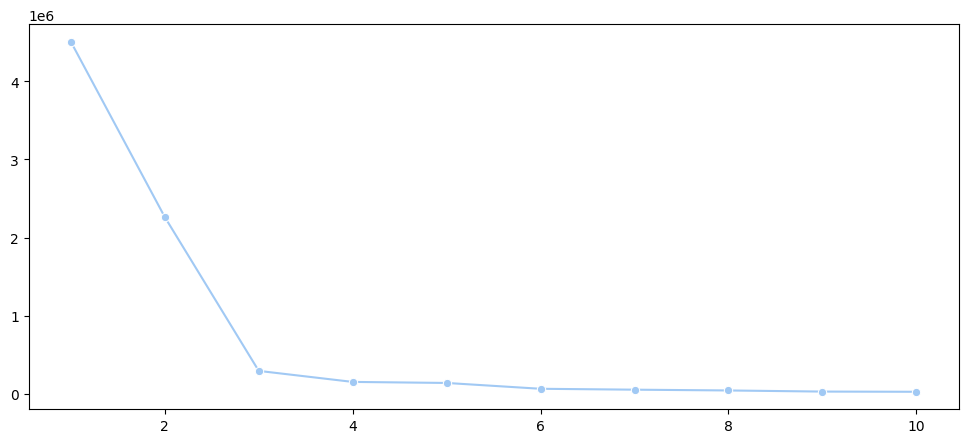

In [ ]:
# Try to find the optimal value of k
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(1, 11), y=inertia, marker='o')
plt.show()

The optimal value of k=3.

# Implementing Clustering

In [ ]:
# The optimal value of k=3
kmeans = KMeans(n_clusters=3, init='k-means++')
labels = kmeans.fit_predict(df_pca)

df_pca['cluster'] = labels
df_pca.head()

,PCA1,PCA2,cluster
0,-2.600899,0.168877,1
1,1.579815,-0.431371,0
2,-0.781311,5.403681,2
3,-0.667876,5.502197,2
4,-0.664670,5.500476,2


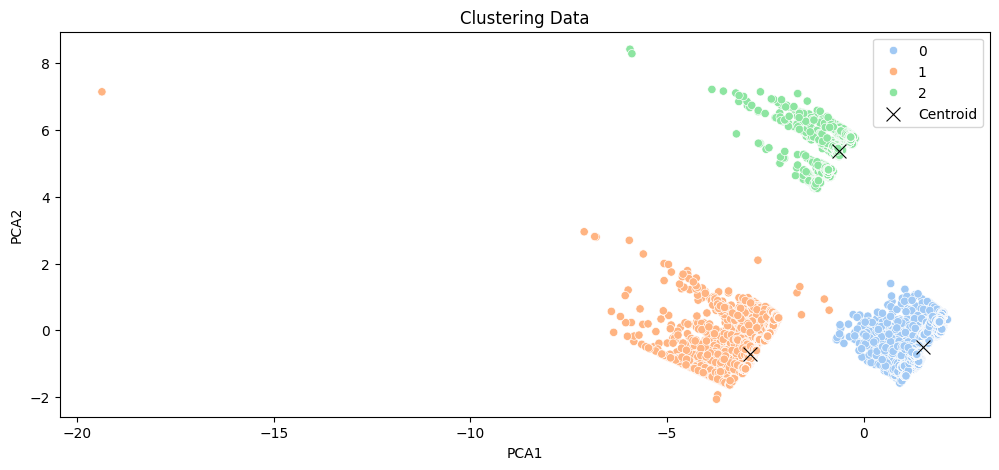

In [13]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_pca, x="PCA1", y="PCA2",
                hue='cluster', palette="pastel")
sns.scatterplot(x=kmeans.cluster_centers_[:, 0],
                y=kmeans.cluster_centers_[:, 1], s=100,
                color="black", marker="x", label="Centroid")
plt.title("Clustering Data")
plt.show()

In [ ]:
# Implementing the cluster into df_sncoded Data Frame
df_encoded['cluster'] = labels

df_grouped = df_encoded.groupby('cluster').mean().reset_index()
df_grouped

,cluster,investment_idr_million,indonesian_workers,jobs_per_trillion,investment_status_PMA,investment_status_PMDN,main_sector_Sektor Primer,main_sector_Sektor Sekunder,main_sector_Sektor Tersier,sector_name_Hotel dan Restoran,"sector_name_Industri Mesin, Elektronik, Instrumen Kedokteran, Peralatan Listrik, Presisi, Optik dan Jam",sector_name_Industri Barang dari Kulit dan Alas Kaki,sector_name_Industri Karet dan Plastik,sector_name_Industri Kayu,sector_name_Industri Kendaraan Bermotor dan Alat Transportasi Lain,sector_name_Industri Kertas dan Percetakan,sector_name_Industri Kimia Dan Farmasi,sector_name_Industri Lainnya,"sector_name_Industri Logam Dasar, Barang Logam, Bukan Mesin dan Peralatannya",sector_name_Industri Makanan,sector_name_Industri Mineral Non Logam,sector_name_Industri Tekstil,sector_name_Jasa Lainnya,sector_name_Kehutanan,sector_name_Konstruksi,"sector_name_Listrik, Gas dan Air",sector_name_Perdagangan dan Reparasi,sector_name_Perikanan,sector_name_Pertambangan,"sector_name_Perumahan, Kawasan Industri dan Perkantoran","sector_name_Tanaman Pangan, Perkebunan, dan Peternakan","sector_name_Transportasi, Gudang dan Telekomunikasi",kbli_2digit_(00-2015) Bidang Usaha Lainnya,kbli_2digit_(00-2020) Bidang Usaha Lainnya,"kbli_2digit_(01-2015) Pertanian tanaman, peternakan, perburuan dan kegiatan YBDI","kbli_2digit_(01-2020) Pertanian Tanaman, Peternakan, Perburuan dan Kegiatan YBDI",kbli_2digit_(02-2015) Kehutanan dan pemanenan kayu dan hasil hutan selain kayu,kbli_2digit_(02-2017) Kehutanan dan pemanenan kayu dan hasil hutan selain kayu,kbli_2digit_(02-2020) Pengelolaan Kehutanan dan Penebangan,kbli_2digit_(03-2015) Perikanan,kbli_2digit_(03-2020) Perikanan,kbli_2digit_(05-2015) Pertambangan batu bara dan lignit,kbli_2digit_(05-2020) Pertambangan Batu Bara dan Lignit,kbli_2digit_(06-2015) Pertambangan minyak bumi dan gas alam dan panas bumi,kbli_2digit_(06-2020) Pertambangan Minyak Bumi dan Gas Alam Dan Panas Bumi,kbli_2digit_(07-2015) Pertambangan bijih logam,kbli_2digit_(07-2020) Pertambangan Bijih Logam,kbli_2digit_(08-2015) Pertambangan dan penggalian lainnya,kbli_2digit_(08-2020) Pertambangan dan Penggalian Lainnya,kbli_2digit_(09-2015) Aktivitas jasa penunjang pertambangan,kbli_2digit_(09-2020) Aktivitas Jasa Penunjang Pertambangan,kbli_2digit_(10-2015) Industri makanan,kbli_2digit_(10-2020) Industri Makanan,kbli_2digit_(11-2015) Industri minuman,kbli_2digit_(11-2020) Industri Minuman,kbli_2digit_(12-2015) Industri pengolahan tembakau,kbli_2digit_(12-2020) Industri Pengolahan Tembakau,kbli_2digit_(13-2015) Industri tekstil,kbli_2digit_(13-2020) Industri tekstil,kbli_2digit_(14-2015) Industri pakaian jadi,kbli_2digit_(14-2020) Industri Pakaian Jadi,"kbli_2digit_(15-2015) Industri kulit, barang dari kulit dan alas kaki","kbli_2digit_(15-2020) Industri Kulit, Barang dari Kulit dan Alas Kaki","kbli_2digit_(16-2015) Industri kayu, barang dari kayu dan gabus (tidak termasuk furnitur) dan barang anyaman dari bambu, rotan dan sejenisnya","kbli_2digit_(16-2020) Industri Kayu, Barang dari Kayu dan Gabus (Tidak Termasuk Furnitur) dan Barang Anyaman dari Bambu, Rotan dan Sejenisnya",kbli_2digit_(17-2015) Industri kertas dan barang dari kertas,kbli_2digit_(17-2020) Industri Kertas dan Barang Dari Kertas,kbli_2digit_(18-2015) Industri pencetakan dan reproduksi media rekaman,kbli_2digit_(18-2020) Industri Pencetakan dan Reproduksi Media Rekaman,kbli_2digit_(19-2015) Industri produk dari batu bara dan pengilangan minyak bumi,kbli_2digit_(19-2020) Industri Produk Dari Batu Bara dan Pengilangan Minyak Bumi,kbli_2digit_(20-2015) Industri bahan kimia dan barang dari bahan kimia,kbli_2digit_(20-2020) Industri Bahan Kimia Dan Barang Dari Bahan Kimia,"kbli_2digit_(21-2015) Industri farmasi, produk obat kimia dan obat tradisional","kbli_2digit_(21-2020) Industri Farmasi, Produk Obat Kimia Dan Obat Tradisional","kbli_2digit_(22-2015) Industri karet, barang dari karet dan plastik","kbli_2digit_(22-2020) Industri Karet, Barang Dari Karet 

In [15]:
df_grouped.shape

(3, 226)

In [16]:
summary = df_grouped.groupby("cluster").agg({
    "investment_idr_million": "mean",
    "jobs_per_trillion": "mean",
    "indonesian_workers": "mean",
    "investment_status_PMA": "mean",
    "investment_status_PMDN": "mean"
}).reset_index().rename(columns={
    'investment_status_PMA': '%PMA',
    'investment_status_PMDN': '%PMDN'
})

summary['%PMA'] = summary['%PMA'] * 100
summary['%PMDN'] = summary['%PMDN'] * 100

summary

,cluster,investment_idr_million,jobs_per_trillion,indonesian_workers,%PMA,%PMDN
0,0,13945.577794,7.206403e+07,15.854209,52.363242,47.636758
1,1,27104.908833,1.396979e+08,69.262371,59.732667,40.267333
2,2,35209.339425,5.989943e+05,85.576511,50.278376,49.721624


# Analyzing Cluster

Mean of investment_idr_million 25419.94201726146


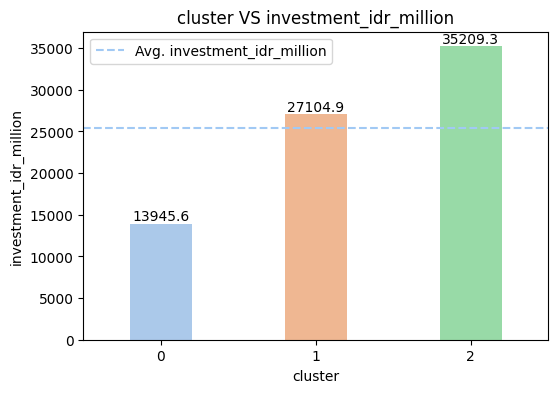

Mean of jobs_per_trillion 70786990.73876846


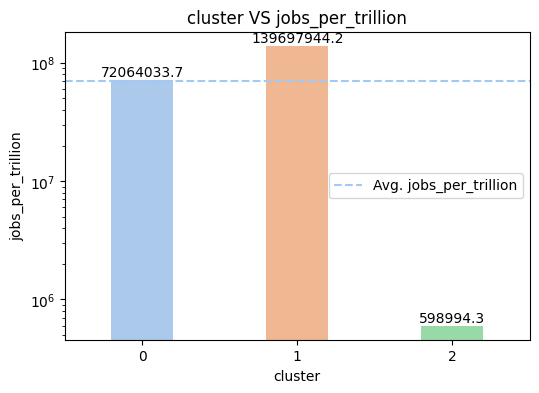

Mean of indonesian_workers 56.89769685726352


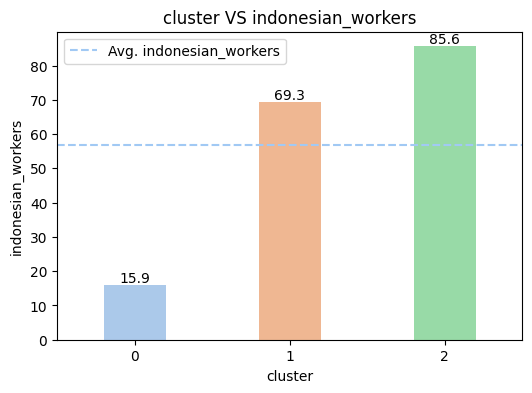

Mean of %PMA 54.12476148645843


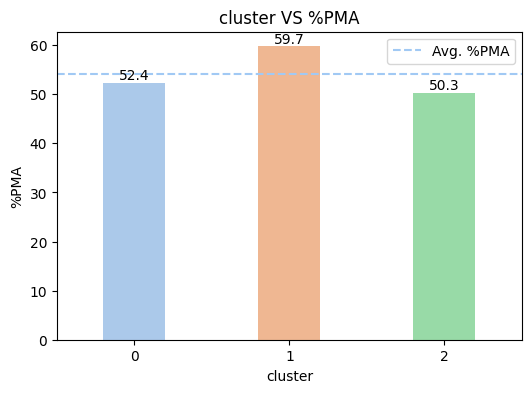

Mean of %PMDN 45.87523851354157


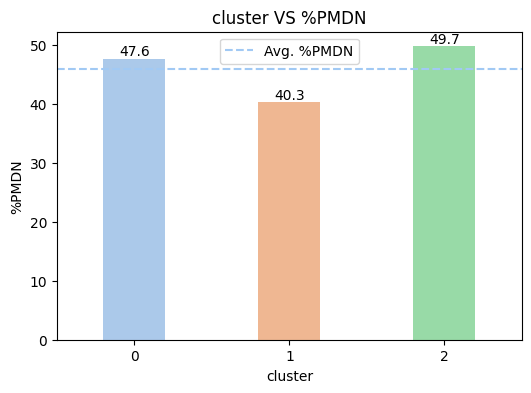

In [ ]:
columns = ['investment_idr_million', 'jobs_per_trillion',
           'indonesian_workers', '%PMA', '%PMDN']

for col in columns:
    plt.figure(figsize=(6,4))
    axes = sns.barplot(x=summary['cluster'],
                       y=summary[col], width=0.4,
                       palette='pastel'
                       )
    for cont in axes.containers:
        axes.bar_label(cont, fmt="%.1f")
        
    avg_pch = summary[col].mean()
    print(f'Mean of {col}', avg_pch)
    
    plt.axhline(y=avg_pch, linestyle='--',
                label=f'Avg. {col}')
    plt.legend()
    plt.title(f'cluster VS {col}')
    
    # add custom log scale for jobs_per_trillion column
    if col == "jobs_per_trillion":
        plt.yscale("log")
    
    plt.show()

**Cluster 0**

- Investment inflows are quite low: Rp 13,945,800,000
- Employment per trillion is quite high: 72,064,033.7 workers employed
- Low employment absorption: 15.9
- The percentage of foreign direct investment (FDI) is higher than domestic direct investment (PMDN): 52.4% and 47.6%

This cluster has potential due to its relatively high absorption rate. However, investment inflows is quite low, resulting in a relatively small number of workers being absorbed. This inflow comes from foreign investors rather than domestic investors, although the percentage difference is not significant.

**Cluster 1**

- Investment inflow is quite high: Rp 27,104,900,000
- Employment per trillion is high: 139,697,944.2 workers absorbed
- High employment absorption: 69.3
- The percentage of foreign direct investment (FDI) is higher than domestic direct investment (PMDN): 59.7% and 40.3%

This cluster is quite proportional among the other clusters in terms of the ratio of inflow investment to the number of workers absorbed. Inflow investment is quite high, as is the number of workers absorbed. However, it is also important to note that foreign investment is significantly higher than domestic investment. If this trend continues, there is concern that economic dependency could lead to resource exploitation.

**Cluster 2**

- Investasi yang masuk tinggi: Rp 35.209.300.000
- Perkerjaan tiap 1 triliun rendah: 598.994,3 tenaga kerja yang diserap
- Pekerjaan yang terserap tinggi 85,6
- Persentase PMA lebih tinggi dari PMDN: 50,3% dan 49,7%

Cluster ini mempunyai investasi masuk yang sangat tinggi namun sayangnya masih kurang sebanding dengan penyerapan tenaga kerjanya. Seharusnya, aada lebih banyak lagi tenaga kerja yang terserap. Meskipun demikian, pada cluster ini antara penanaman modal asing dengan penanaman dalam negeri lebih cukup seimbang.

In [18]:
df['cluster'] = labels
df.head()

,period,investment_status,region,country,main_sector,sector_name,kbli_2digit,province,district_city,java_outside_java,island,investment_idr_million,investment_usd_thousand,indonesian_workers,year,quarter,jobs_per_trillion,cluster
0,2010-Q1,PMA,Afrika,Mauritania,Sektor Sekunder,Industri Makanan,(10-2015) Industri makanan,Kalimantan Tengah,Kabupaten Seruyan,Luar Jawa,Kalimantan,279631.2,29748.0,0,2010,Q1,0.000000,1
1,2010-Q1,PMA,Afrika,Mauritius,Sektor Tersier,Perdagangan dan Reparasi,"(46-2015) Perdagangan besar, bukan mobil dan s...",Nusa Tenggara Barat,Kota Mataram,Luar Jawa,Bali dan Nusa Tenggara,0.0,0.0,44,2010,Q1,0.000000,0
2,2010-Q1,PMA,Afrika,Seychelles,Sektor Primer,Pertambangan,(06-2015) Pertambangan minyak bumi dan gas ala...,Riau,Kabupaten Bengkalis,Luar Jawa,Sumatera,2265.3,241.0,692,2010,Q1,305478.303095,2
3,2010-Q1,PMA,Afrika,Seychelles,Sektor Primer,"Tanaman Pangan, Perkebunan, dan Peternakan","(01-2015) Pertanian tanaman, peternakan, perbu...",Kalimantan Barat,Kabupaten Sanggau,Luar Jawa,Kalimantan,0.0,0.0,110,2010,Q1,0.000000,2
4,2010-Q1,PMA,Afrika,Seychelles,Sektor Primer,"Tanaman Pangan, Perkebunan, dan Peternakan","(01-2015) Pertanian tanaman, peternakan, perbu...",Nusa Tenggara Barat,Kabupaten Lombok Barat,Luar Jawa,Bali dan Nusa Tenggara,0.0,0.0,90,2010,Q1,0.000000,2


In [ ]:
# Saving the result into a csv file
# df.to_csv('Investment Data.csv', index=False)

In [ ]:
# Investigate the cluster by province
cluster_by_province = pd.crosstab(df['province'], df['cluster'])
cluster_by_province = cluster_by_province.stack().reset_index(name='count')
cluster_by_province

,province,cluster,count
0,Aceh,0,7792
1,Aceh,1,1834
2,Aceh,2,1862
3,Bali,0,41759
4,Bali,1,4516
5,Bali,2,935
6,Banten,0,19303
7,Banten,1,17650
8,Banten,2,1423
9,Bengkulu,0,2336


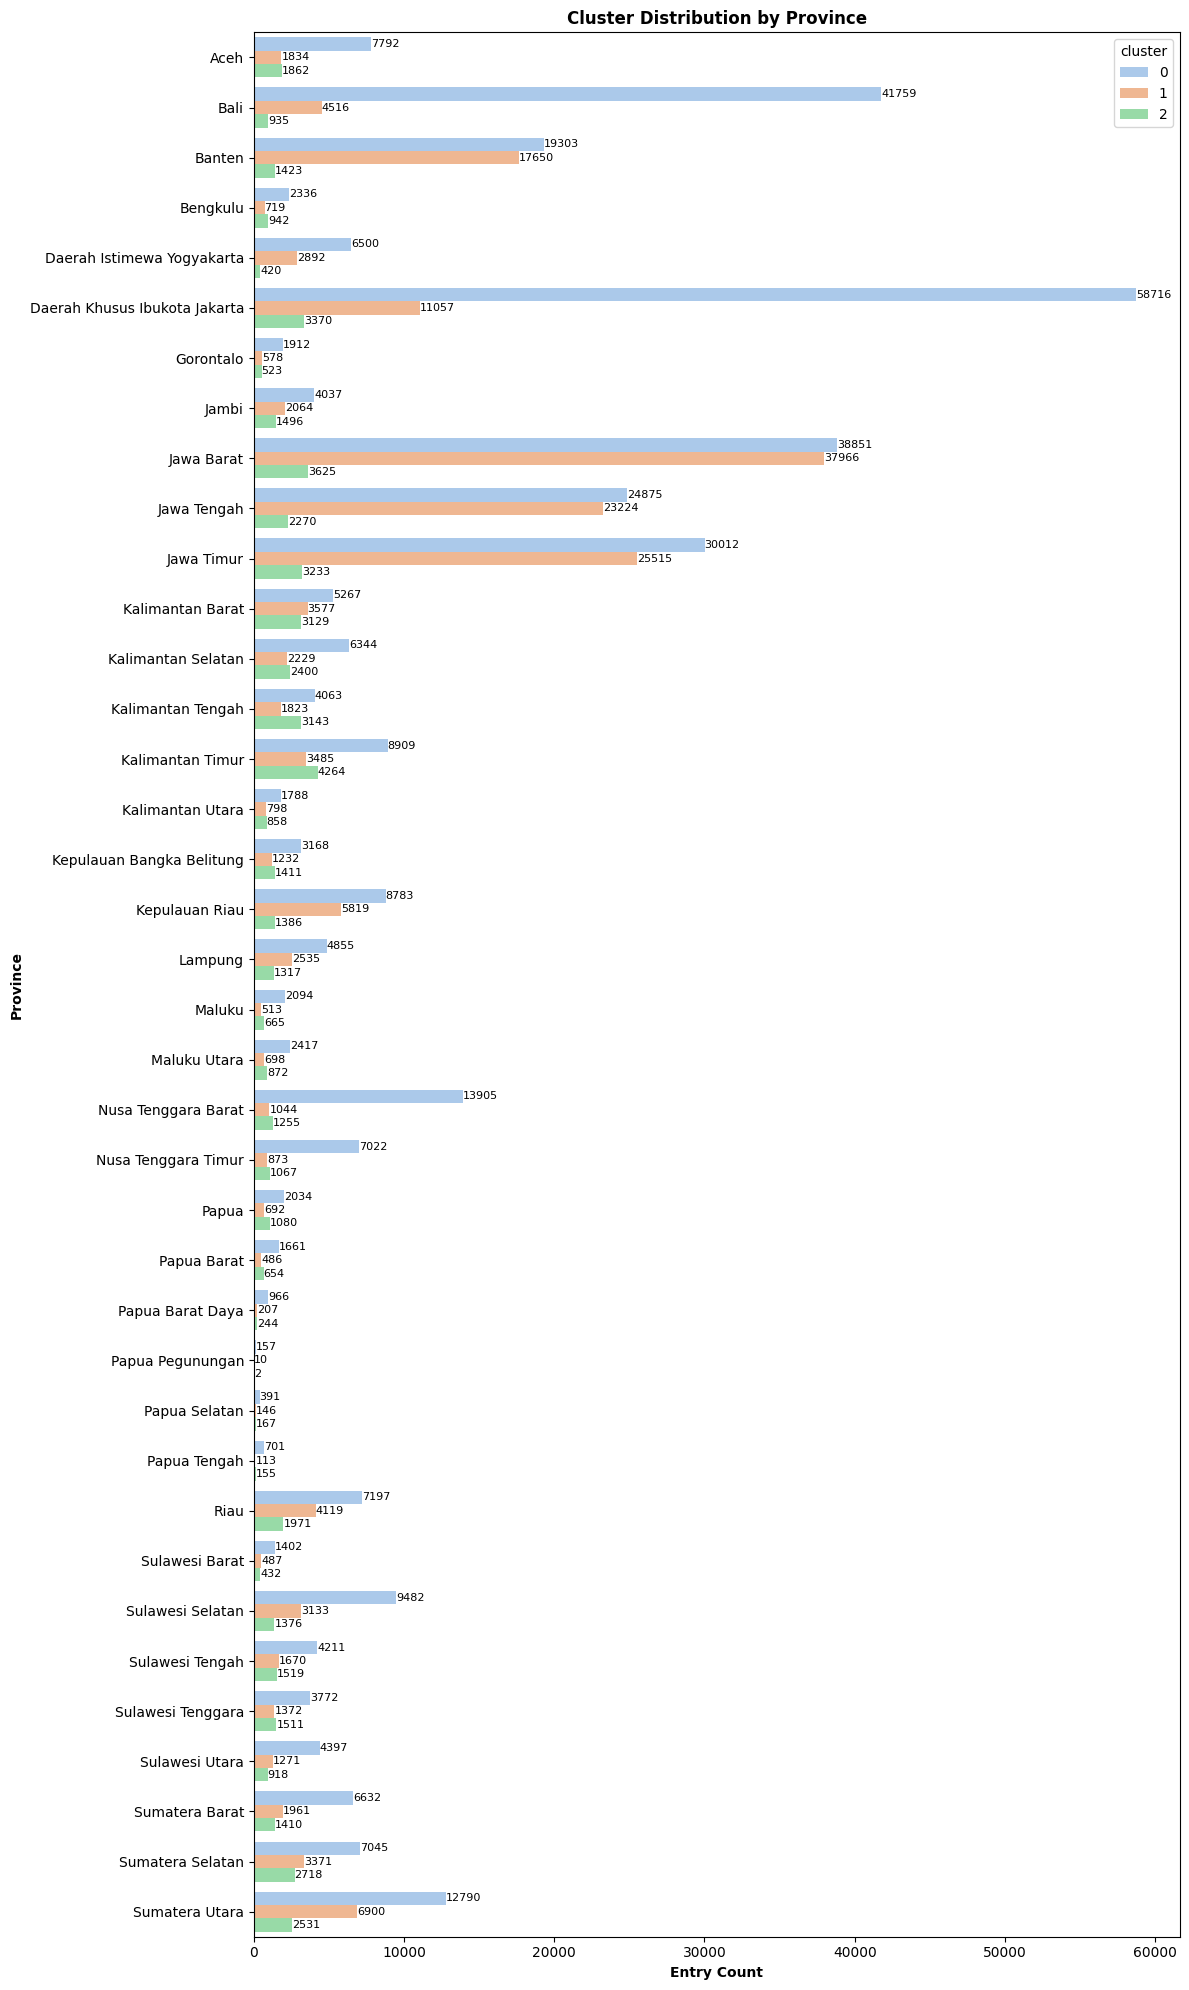

In [ ]:
# Making visualization for cluster distribution by province
plt.figure(figsize=(12, 20))
ax = sns.barplot(cluster_by_province, x='count', y='province', hue='cluster', orient='h', palette='pastel')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=8)
plt.title('Cluster Distribution by Province', **{'fontweight': 'bold'})
plt.xlabel('Entry Count', **{'fontweight': 'bold'})
plt.ylabel('Province', **{'fontweight': 'bold'})
plt.tight_layout()
plt.show()